In [2]:
import tests.generate_tests as test
from copy import deepcopy
import math
from Point import Point
from Rectangle import Rectangle
from visualizer_bit.main import Visualizer
import matplotlib.pyplot as plt
import numpy as np
vis = Visualizer()

In [2]:
import numpy as np
def random_points(n,x,y):
    res=[]
    for _ in range(n):
        res.append((np.random.uniform(0,x),np.random.uniform(0,y)))
    return res

[(100, np.float64(19.914945062366)), (100, np.float64(55.18794168362024)), (np.float64(68.08271103803341), 0), (100, np.float64(80.63191030130415)), (100, np.float64(8.128467099730727)), (0, np.float64(97.25118685130701)), (0, np.float64(62.91850927402123)), (0, np.float64(4.100718841052526)), (100, np.float64(30.20032965994716)), (100, np.float64(48.295767419262546)), (np.float64(89.39296657599769), 100), (100, np.float64(67.43499901390294)), (100, np.float64(13.438869773993787)), (100, np.float64(96.0024833442271)), (100, np.float64(44.83441818443498)), (100, np.float64(29.825145585457648)), (100, np.float64(35.40871950715868)), (np.float64(9.651385833609094), 100), (100, np.float64(17.198543912996143)), (np.float64(33.36261696427765), 100), (100, np.float64(46.876401106509604)), (100, np.float64(38.94760033384972)), (0, np.float64(37.91371310503939)), (0, np.float64(83.73199907824426)), (np.float64(88.08883652756512), 0), (100, np.float64(44.457721862844494)), (100, np.float64(87.70

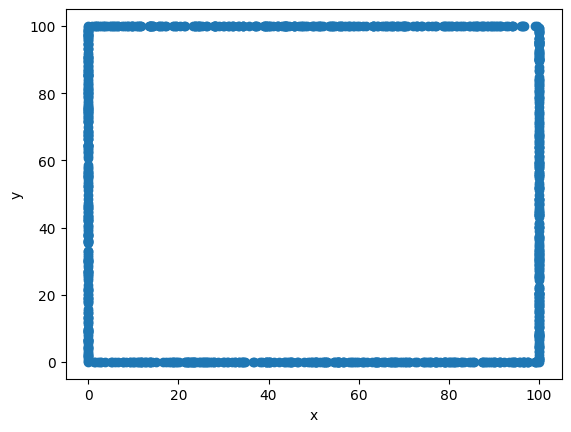

In [3]:
cos = test.generate_random_points_on_rectangle(1000,0,100,0,100)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

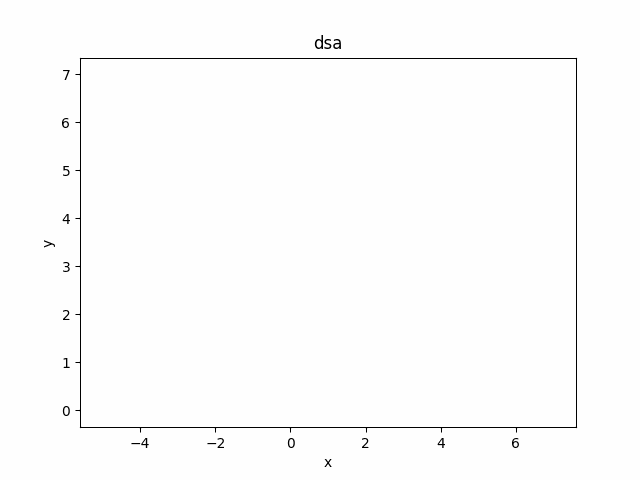

In [4]:
import kd_tree_vis
test2 = [(-5,1.5),(-3,4),(-2.5,1),(-5,7),(-2,6),(5,0),(0,3),(7,1),(2,7),(3,5)]
tmp = kd_tree_vis.visualization()
visual = tmp.give_visualization_of_create(test2)
visual.add_title("dsa")
visual.show_gif()

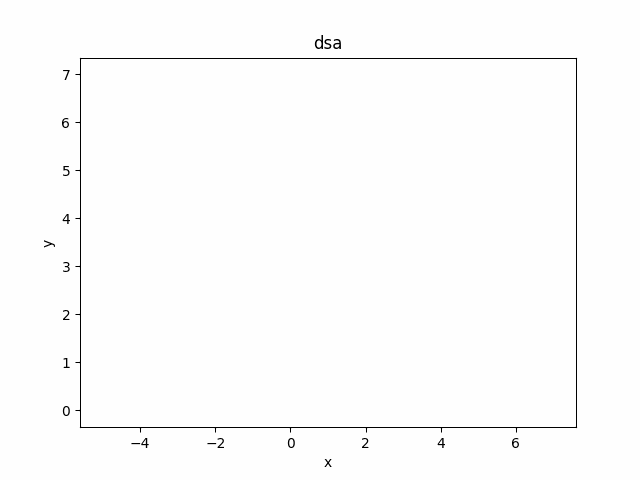

In [5]:
visual = tmp.give_visualization_of_search((-1,1),(4,6))
visual.add_title("dsa")
visual.show_gif(interval=400)

[(0, 5.409905509790889), (-46.90670386530795, 0), (33.04362905236728, 0), (0, 13.35729224998672), (14.34690229105287, 0), (25.967650731390606, 0), (0, -9.001050791789801), (1.2083760586415124, 0), (-33.77664579122694, 0), (0, 23.55794061496327), (-43.28464476576976, 0), (8.414567514155749, 0), (0, 18.76222470992583), (0, 20.43821133871613), (46.73732303965495, 0), (0, -19.987590645392793), (11.118555398670338, 0), (0, 30.833803167195015), (0, -0.7508156311256258), (-35.64164217043753, 0), (0, -1.4996427989651053), (-37.559007761790326, 0), (45.51659093503595, 0), (-7.25057191074108, 0), (-14.447371818894425, 0), (0, -44.660207901369986), (0, -27.663995143706444), (0, -8.896673827615686), (-40.98429188269564, 0), (0, 6.965828605320901), (0, -15.602474309932411), (0, -41.770046494255986), (23.63561383728336, 0), (-49.68674954198333, 0), (-18.37953561804756, 0), (-33.60291634824833, 0), (32.3685450484986, 0), (17.82651524114067, 0), (0, 19.56301137212381), (0, 9.886434084738262), (9.27700

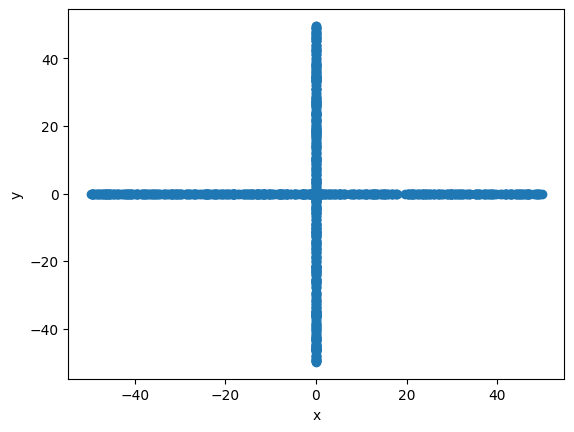

In [6]:
cos = test.cross_on_axes(1000,-50,50,-50,50)
# print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

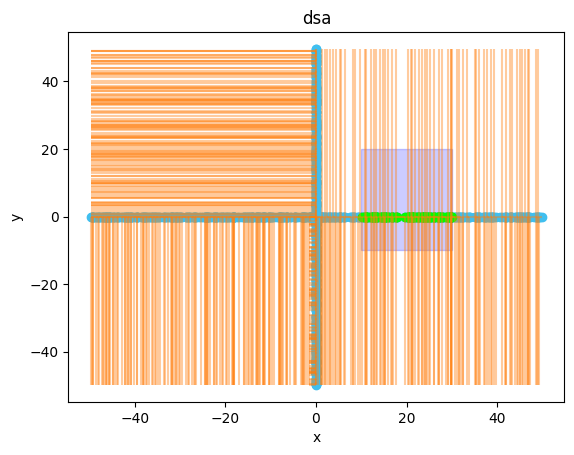

In [7]:
import kd_tree_vis
tmp = kd_tree_vis.visualization()
visual = tmp.give_visualization_of_create(cos)
visual = tmp.give_visualization_of_search((10,-10),(30,20))
visual.add_title("dsa")
visual.show()

[(0, np.float64(4.992318936528704)), (0, np.float64(48.42226684778541)), (100, np.float64(8.509499405271413)), (np.float64(79.57324336832522), 0), (np.float64(90.03452816514046), 100), (0, np.float64(21.360328468797206)), (np.float64(81.9703760435305), 0), (0, np.float64(90.90995922782656)), (0, np.float64(66.52533681773781)), (np.float64(56.36618200258292), 100), (0, np.float64(31.46121171549379)), (np.float64(92.87442128136288), 0), (np.float64(37.39505293193406), 0), (np.float64(75.06900370350397), 0), (100, np.float64(72.9939582203074)), (0, np.float64(21.388216875985734)), (0, np.float64(63.64071454153742)), (np.float64(59.319670035120765), 0), (0, np.float64(61.034696434124214)), (0, np.float64(16.502382781049164)), (np.float64(14.272213792754629), 100), (100, np.float64(45.781001772640906)), (np.float64(63.71645989238948), 100), (100, np.float64(53.24463865371939)), (100, np.float64(42.00809103605593)), (0, np.float64(52.32553244832076)), (np.float64(58.765592297623215), 100), (

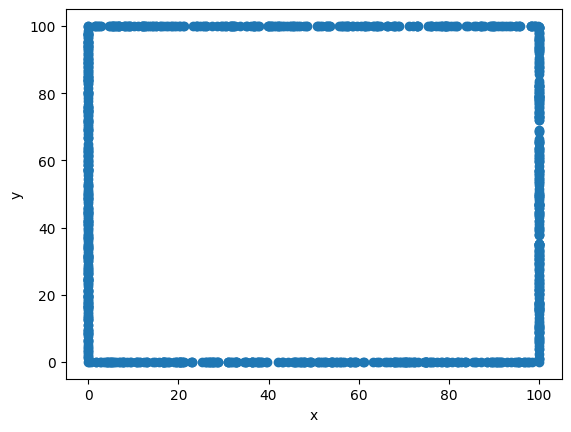

In [ ]:
cos = test.generate_random_points_on_rectangle(1000,0,100,0,100)
# print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

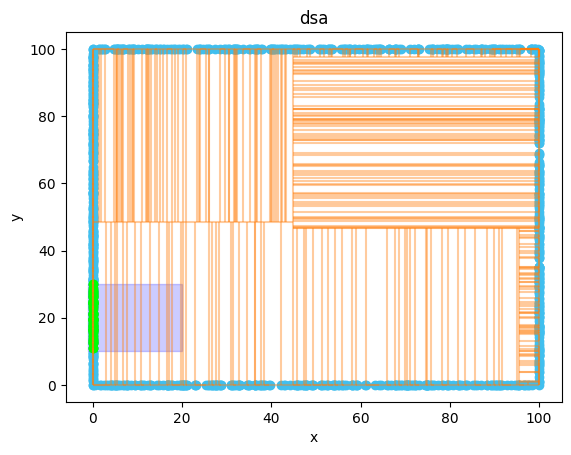

In [9]:
import kd_tree_vis
# visual.clear()
tmp2 = kd_tree_vis.visualization()
tmp2.give_visualization_of_create(cos)
visual = tmp2.give_visualization_of_search((-1,10),(20,30))
visual.add_title("dsa")
visual.show()

[(np.float64(10.767717085069345), np.float64(9.585814036013174)), (np.float64(11.97044359957959), np.float64(10.368905983672159)), (np.float64(9.833829550477036), np.float64(12.30043045879385)), (np.float64(9.576763617630274), np.float64(8.542292445531638)), (np.float64(10.676300672729964), np.float64(10.878377306522882)), (np.float64(9.560984538067027), np.float64(10.852154676721643)), (np.float64(10.505160203286412), np.float64(10.208781786497234)), (np.float64(11.278152745527086), np.float64(10.473371673931918)), (np.float64(10.326129122927668), np.float64(9.231241799722167)), (np.float64(9.190581235369255), np.float64(9.72669320571375)), (np.float64(10.335959931922401), np.float64(11.079738836199958)), (np.float64(12.769058443432405), np.float64(10.867602349749465)), (np.float64(8.881101585484343), np.float64(10.79954132683734)), (np.float64(9.234844852784581), np.float64(8.980427664750273)), (np.float64(10.140786948508461), np.float64(8.991762760971346)), (np.float64(9.76604174303

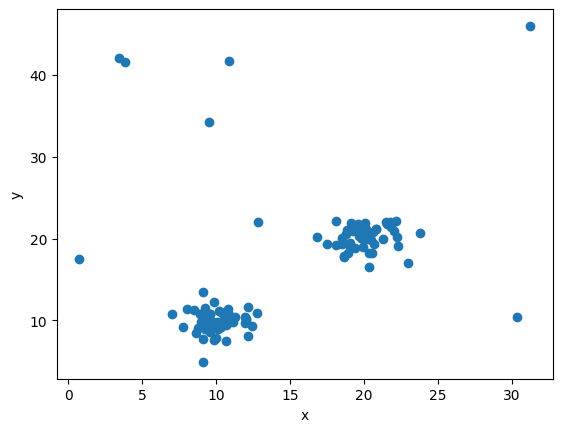

In [ ]:
cos = test.add_outliners(10,test.generate_clasters(100,2,0,10,0,10),0,10,0,10)
# print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

In [11]:
from kd_tree import KdTree
import brute
drzewo = KdTree(cos,2)
kd_ans = set(drzewo.find_points_in_region(((1,10),(20,30))))
brute_ans = set(brute.brute_2d(cos,(1,10),(20,30)))
print()
print(kd_ans-brute_ans)


set()


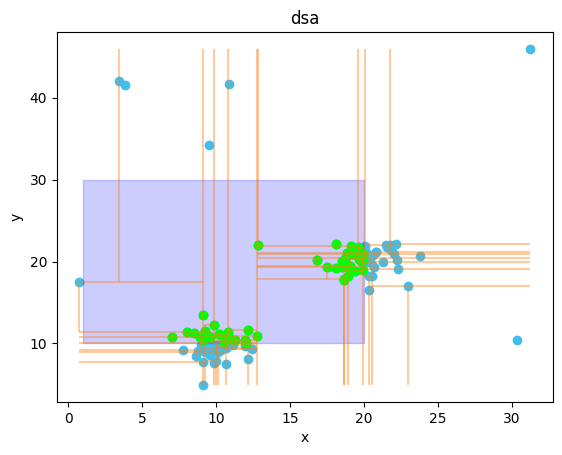

In [12]:
import kd_tree_vis
# visual.clear()
tmp2 = kd_tree_vis.visualization()
tmp2.give_visualization_of_create(cos)
visual = tmp2.give_visualization_of_search((1,10),(20,30))
visual.add_title("dsa")
visual.show()

[(np.float64(-4.498439937867251), np.float64(-0.12038991675599364)), (np.float64(-8.698935767352005), np.float64(-12.371944267148038)), (np.float64(-3.6376642430857897), np.float64(16.748604755215197)), (np.float64(-0.04884653537154415), np.float64(13.837639008257222)), (np.float64(7.945890051367466), np.float64(-4.9562341681681215)), (np.float64(10.811747522084776), np.float64(7.881720137162381)), (np.float64(-4.933425609042629), np.float64(1.4025847777376068)), (np.float64(-9.109202718866594), np.float64(-13.384416804601951)), (np.float64(3.3485066079445964), np.float64(-6.103453160324773)), (np.float64(4.5157136617893485), np.float64(2.876931643850189))]


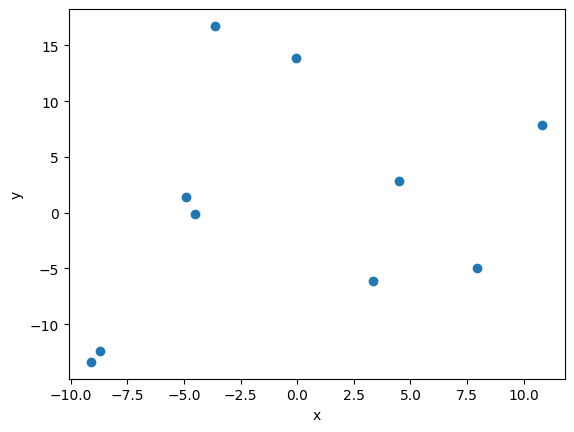

In [13]:
cos = test.generate_standard_distribution(10,1,1,10,10)
# print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

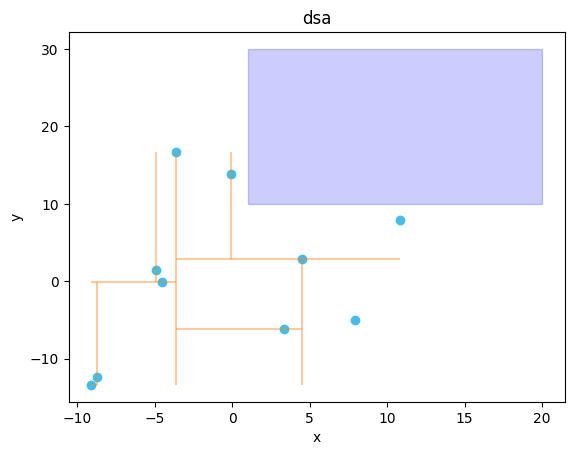

In [14]:
import kd_tree_vis
tmp2 = kd_tree_vis.visualization()
visual = tmp2.give_visualization_of_create(cos)
visual = tmp2.give_visualization_of_search((1,10),(20,30))
visual.add_title("dsa")
visual.show()

In [4]:
from kd_tree import KdTree
testa = test.generate_multidimensional_cluster(5,2,10,4)
print(testa)
a = KdTree(testa,4)
# print(a.root.print_tree())

print(a.find_points_in_region(((-3,0,0,0),(10,10,10,10))))
for poin in testa:
    print(a.check_contains(poin))

from kd_tree import KdTree
import brute

kd_ans = set(a.find_points_in_region(((-3,0,0,0),(10,10,10,10))))
brute_ans = set(brute.brute_2d(testa,(-3,0,0,0),(10,10,10,10)))
print()
print(kd_ans-brute_ans)
#chyba działa

[[5.01054152 2.00151038 5.77856079 1.14202947]
 [4.22255113 5.09470902 2.21549434 3.95832327]
 [7.14262285 5.24244205 2.78993435 4.70878645]
 [6.18162064 5.69434308 4.89706333 5.12211501]
 [5.12256891 3.09303998 7.19425339 4.82456019]
 [2.09803159 3.32645293 8.68178905 7.48153654]
 [4.16251616 1.8456434  2.7295229  8.19842528]
 [4.96590862 6.38433391 6.56693897 3.64223834]
 [6.77564896 6.08691602 2.04319831 2.11116314]
 [5.86931381 4.04710215 3.91120396 6.64874079]]
[array([5.01054152, 2.00151038, 5.77856079, 1.14202947]), array([4.16251616, 1.8456434 , 2.7295229 , 8.19842528]), array([2.09803159, 3.32645293, 8.68178905, 7.48153654]), array([4.22255113, 5.09470902, 2.21549434, 3.95832327]), array([4.96590862, 6.38433391, 6.56693897, 3.64223834]), array([7.14262285, 5.24244205, 2.78993435, 4.70878645]), array([5.86931381, 4.04710215, 3.91120396, 6.64874079]), array([5.12256891, 3.09303998, 7.19425339, 4.82456019]), array([6.77564896, 6.08691602, 2.04319831, 2.11116314]), array([6.181620